## DATA WRANGLING AND ANALYSIS

### Introduction
In this project we will be looking at the processes of data wrangling that is *Gathering, Accessing* and *Cleaning* Process, then to *Analysing*, *Visualizing* and *storing* of the data. 

In the Gathering process we will look at different ways in which we can get our data; 
* Reading data in flat files to our notebook 
* Downloading data programmatically using the Requests library
* Furthermore, Gathering additional data from the Twitter API

After gathering our data which is the first step in our wrangling process, we will move to *Accessing* these data which is the second step in our wrangling process either visually by scrolling through our data or programmatically by code.
While accessing our data we will be on the look out for Quality and Tidiness issue in our data, documenting any issue detected to make the last step of the wrangling process easier.

The last step in our wrangling process is *Cleaning*. After our data has been accessed the remaining process is cleaning, this is easily done with the issues of our data be documented. Using pandas we write codes to fix these Quality and Tidiness Issue detected while accessing our data.The steps of cleaning involves; 
* Define - Defining how to clean the issue
* Code - Executing the code to fix it
* Test - Testing to confirm the issue has been fixed

However, after our data has been cleaned we will analyse and visualize these data to understand better what's happening then store the data.

In the Project we will be working on **WeRateDogs Twitter archive**

### Gathering Data

This is the first step in our wrangling Process.
* First we Read data **twitter-archive-enhanced.csv** using pandas to our notebook. 
* Downloading The tweet image predictions **image_predictions.tsv** programmatically using the Requests library from the URL:
  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.
* Gathering additional data from the Twitter API, Gather each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive.


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading and loading twitter-archive-enhanced.csv
tw_arch = pd.read_csv('twitter-archive-enhanced.csv')
tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None



Downloading The tweet image predictions **image_predictions.tsv** programmatically using the Requests library from the URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv. Then reading it to our notebook


In [3]:
# Reading downloading the tweet image predictions image_predictions.tsv programmatically using the Requests library
import requests
import os

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open (os.path.join('./', url.split('/')[-1]), mode='wb')as file:
    file.write(response.content)

In [6]:
# Loading image-prediction.tsv
image_preds = pd.read_csv('image-predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Gathering additional data from the Twitter API; each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive using the **twitter_api.py** and **tweet_json.txt** provided in the udacity project page, reading this .txt file line by line into a pandas DataFrame



In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [8]:
tweet_ids = tw_arch.tweet_id.values
len(tweet_ids)

2356

In [9]:
# Defining the elements needed 
elements = ['id', 'favorite_count', 'retweet_count']

# Defining the required Dictionary
tweet_list = []
with open('tweet-json.txt', 'r') as file: 
    json_tweet = file.readline()
    while json_tweet:
        dictionary = json.loads(json_tweet)
        tweet_row = dict((i, dictionary[i]) for i in elements)
        tweet_list.append(tweet_row)
        json_tweet = file.readline()
        
            
# create DataFrame    
tw_json = pd.DataFrame.from_dict(tweet_list)

# confirm
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [10]:
# Viewing tw_json
tw_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Accessing Data

This is the second step in the wrangling process, after all our data have been gathered.
We are going to visually access our **twitter-archive-enhanced.csv** files in Excel and **image-predictions.tsv** in sublime.
However, In this notebook we are going to access our data programmatically, documenting every Quality and Tidiness issues detected for easy cleaning

In [11]:
# viewing sample of tw_arch
tw_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
2023,671896809300709376,NaN,NaN,2015-12-02 03:40:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828011680...,11,10,Brutus,None,None,None,None
497,813142292504645637,NaN,NaN,2016-12-25 22:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813142292...,13,10,None,None,None,None,None
1434,697270446429966336,NaN,NaN,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,None,None,None,None


In [12]:
tw_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
# Viewing general info in tw_arch
tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# Viewing tw_arch statistics
tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tw_arch.loc[tw_arch.rating_denominator != 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
# Viewing random samples in image_preds
image_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1643,808001312164028416,https://pbs.twimg.com/media/CzaY5UdUoAAC91S.jpg,1,Labrador_retriever,0.730959,True,Staffordshire_bullterrier,0.130726,True,American_Staffordshire_terrier,0.028853,True
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1392,767122157629476866,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2,toy_poodle,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True
317,671744970634719232,https://pbs.twimg.com/media/CVKEfMKWoAAR-Ud.jpg,1,ice_bear,0.251193,False,ram,0.213839,False,Arctic_fox,0.081551,False


In [17]:
image_preds.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [18]:
# Checking for duplicates
image_preds.duplicated().sum()

0

In [19]:
# Displaying general info of image_preds
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# Checking the statistics of image_preds
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
# Viewing tw_json sample
tw_json.sample(10)

,id,favorite_count,retweet_count
172,858471635011153920,22640,5271
1173,720043174954147842,5332,2253
950,751937170840121344,5770,1530
1616,684969860808454144,2374,421
2332,666293911632134144,522,368
185,856288084350160898,545,17
2263,667534815156183040,866,576
978,749774190421639168,5114,1493
1931,674019345211760640,1208,340
893,759159934323924993,0,1359


In [22]:
# Checking if there is any duplicates id
tw_json.id.duplicated().sum()

0

In [23]:
# displaying the info
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issues

**Quality**

* erroneous datatypes in tw_arch table  like the tweet_id and timestamp
* dropping some less revelant columns in tw_arch dataset ie **source, text, in_reply_to_status_id, in_reply_to_user_id,
  retweeted_status_user_id, expanded_urls, retweeted_status_timestamp**
* we are only interested in original ratings (no retweets) in tw_arch table
* incorrect denominator value for index 313 and 1120
* missing data in image_preds with only 2075 entries
* wrong datatype of tweet_id in image_preds
* missing data in tw_json having 2354 entries
* different representation of tweet_id name in tw_json table ie id instead of tweet_id
* datatype of the renamed tweet_id should be string
* the new column for dog stage created should be of datatype category
* null values is represented by None
* some Incorrect dog names and different cases
* p1_conf, p2_conf and p3_conf decimals places needs to be rounded off and multiply by 100

**Tidiness**

* In tw_arch table the dog stage columns should be in a single column having its value as the stage  
* the three tables **tw_arch**, **image_preds** and **tw_json** should be merged into one dataset 

## Cleaning Data

This is the third step in the wrangling process. Where we will be able to fix the issues detected in our datasets, this involves three stages; 
* Define
* Code
* Test

Before the cleaning process we create a copy of our datasets, to keep our original feel from being replaced

**Note:** We are not going to fix these issue of missing data since they were not collected during the gathering process, we are going to work with the data we already have gathered 

In [24]:
# Creating a copy of our datasets
tw_arch_cln = tw_arch.copy()
image_preds_cln = image_preds.copy()
tw_json_cln = tw_json.copy()

#### Fixing Quality Issues 

**Define;**
* Let's convert tweet_id dtype in tw_arch_cln to string
* And also timestamp in tw_arch_cln to datetime64

**Code**

In [25]:
tw_arch_cln.tweet_id = tw_arch_cln.tweet_id.astype(str)
tw_arch_cln.timestamp = tw_arch_cln['timestamp'].astype('datetime64[ns]')

**Test**

In [26]:
tw_arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

**Define;**

* Dropping less relevant columns

**Code**

In [27]:
# Selecting the columns 
discard = tw_arch_cln[['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'text', 'retweeted_status_user_id', 'expanded_urls','retweeted_status_timestamp']]
# Dropping columns
tw_arch_cln = tw_arch_cln.drop(discard, axis=1)

**Test**

In [28]:
tw_arch_cln.head()

,tweet_id,timestamp,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,NaN,12,10,Franklin,None,None,None,None


**Define;**

* Since we are only interested in original data in the tw_arch_cln we are going to select null values in 'retweeted_status_id' column 
* Then drop the **retweeted_status_id** column and also reset index 

**Code**

In [29]:
# Selecting null in retweeted_status_id
tw_arch_cln = tw_arch_cln[tw_arch_cln['retweeted_status_id'].isnull()]
tw_arch_cln.reset_index(drop=True, inplace=True)

In [30]:
# Dropping the retweeted_status_id column
tw_arch_cln = tw_arch_cln.drop('retweeted_status_id', axis=1)

**Test**

In [31]:
tw_arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   rating_numerator    2175 non-null   int64         
 3   rating_denominator  2175 non-null   int64         
 4   name                2175 non-null   object        
 5   doggo               2175 non-null   object        
 6   floofer             2175 non-null   object        
 7   pupper              2175 non-null   object        
 8   puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 153.1+ KB


In [32]:
tw_arch_cln.sample(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1617,677301033169788928,2015-12-17 01:35:24,5,10,Juckson,None,None,None,None
1760,673887867907739649,2015-12-07 15:32:42,10,10,None,None,None,None,None
1114,708026248782585858,2016-03-10 20:26:26,13,10,None,None,None,None,None
98,871102520638267392,2017-06-03 20:33:19,14,10,None,doggo,None,None,None
118,866686824827068416,2017-05-22 16:06:55,12,10,Lili,None,None,None,None
1614,677331501395156992,2015-12-17 03:36:28,9,10,Humphrey,None,None,None,None
457,804475857670639616,2016-12-02 00:02:45,13,10,None,None,None,None,None
1251,697575480820686848,2016-02-11 00:18:49,8,10,Ole,None,None,None,None
1374,688908934925697024,2016-01-18 02:21:04,8,10,Clarence,None,None,None,None
564,786051337297522688,2016-10-12 03:50:17,13,10,None,None,None,None,puppo


**Define**

correct the denominator value of not equal to 10

**Code**

In [33]:
tw_arch_cln.loc[(tw_arch_cln.rating_denominator != 10 ), 'rating_denominator'] = 10

**Test**

In [34]:
tw_arch_cln.describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.0
mean,13.215172,10.0
std,47.725696,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


**Define:**

Let's round off p1_conf, p2_conf and p3_conf to 3 decimal places and multiply by 100

**Code**

In [35]:
image_preds_cln.p1_conf = image_preds_cln.p1_conf.round(3) * 100
image_preds_cln.p2_conf = image_preds_cln.p2_conf.round(3) * 100
image_preds_cln.p3_conf = image_preds_cln.p3_conf.round(3) * 100

**Test**

In [36]:
image_preds_cln.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5,True,collie,15.7,True,Shetland_sheepdog,6.1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.7,True,miniature_pinscher,7.4,True,Rhodesian_ridgeback,7.2,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6,True,malinois,13.9,True,bloodhound,11.6,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8,True,redbone,36.1,True,miniature_pinscher,22.3,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0,True,Rottweiler,24.4,True,Doberman,15.5,True


**Define:**
* converting tweet_id in image_preds_cln to string

**Code**

In [37]:
image_preds_cln.tweet_id = image_preds.tweet_id.astype(str)

**Test**

In [38]:
image_preds_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define;**
* Changing the column id name of tw_json_cln to tweet_id

**Code**

In [39]:
tw_json_cln.rename(columns={'id':'tweet_id'}, inplace=True)

**Test**

In [40]:
tw_json_cln.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Define;**
* Let's the renamed tweet_id column to string

**Code**

In [41]:
tw_json_cln.tweet_id = tw_json_cln.tweet_id.astype(str)

**Test**

In [42]:
tw_json_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


**Define**
* We are going to replace the None values that is used in representing null values to Nan using the replace function`

**Code**

In [43]:
# using replace function 
tw_arch_cln.replace('None', np.nan, inplace=True)

**Test**

In [44]:
tw_arch_cln.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN,NaN,NaN,NaN


**Define:**
* Let's fix the incorrect name of some dog name in tw_arch table. Earlier we replace the None in the table to NaN, so we focus on the value 'a' and 'the' to NaN

**Code**

In [45]:
# Using replace function to change the name
tw_arch_cln.name.replace('a', np.nan, inplace=True)
tw_arch_cln.name.replace('the',np.nan, inplace=True)

**Test**

In [46]:
tw_arch_cln.sample(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
122,865359393868664832,2017-05-19 00:12:11,13,10,Sammy,NaN,NaN,NaN,NaN
311,828409743546925057,2017-02-06 01:07:28,12,10,Mutt,NaN,NaN,NaN,NaN
269,834458053273591808,2017-02-22 17:41:18,12,10,Chester,NaN,NaN,NaN,NaN
328,826476773533745153,2017-01-31 17:06:32,12,10,Pilot,doggo,NaN,NaN,NaN
1082,710153181850935296,2016-03-16 17:18:07,11,10,Lacy,NaN,NaN,NaN,NaN
1061,712092745624633345,2016-03-22 01:45:15,7,10,Steven,NaN,NaN,NaN,NaN
374,819004803107983360,2017-01-11 02:15:36,14,10,Bo,doggo,NaN,NaN,NaN
696,763183847194451968,2016-08-10 01:23:03,8,10,Clark,NaN,NaN,NaN,NaN
169,854482394044301312,2017-04-18 23:50:52,13,10,Arya,NaN,NaN,NaN,NaN
688,765669560888528897,2016-08-16 22:00:23,12,10,Tove,NaN,NaN,NaN,NaN


**Define**

uniform dog names by reducing it to lowercase

**Code**

In [47]:
tw_arch_cln.name = tw_arch_cln.name.str.lower()

**Test**

In [48]:
tw_arch_cln.name.value_counts()

lucy          11
charlie       11
oliver        10
cooper        10
tucker         9
              ..
wishes         1
rose           1
theo           1
fido           1
christoper     1
Name: name, Length: 953, dtype: int64

#### Fixing Tidiness Issues

* In tw_arch table the dog stage columns should be in a single column having its value as the stage 
* the three datasets **tw_arch**, **image_preds** and **tw_json** should be merged into one dataset 

**Define:**

we will write function to return the dog_stages name if present in the *doggo, floofer, pupper and puppo* column and NaN if absent. Then apply it to dog_stage column created.
Afterwards, we drop the *doggo, floofer, pupper and puppo* column and also change the datatype of the created dog_stage to category

**Code**

In [49]:
def dog(row):
    if row['doggo'] == 'doggo':
        return 'doggo'
    elif row['floofer'] == 'floofer':
        return 'floofer'
    elif row['pupper'] == 'pupper':
        return 'pupper'
    elif row['puppo'] == 'puppo':
        return 'puppo'
    else:
        return None
tw_arch_cln = tw_arch_cln.assign(dog_stage=tw_arch_cln.apply(dog, axis=1))

In [50]:
col_drop = tw_arch_cln[['doggo', 'floofer', 'pupper', 'puppo']]
tw_arch_cln = tw_arch_cln.drop(col_drop, axis=1)

In [51]:
tw_arch_cln.dog_stage = tw_arch_cln.dog_stage.astype('category')

**Test**

In [52]:
tw_arch_cln.sample(10)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage
1430,685547936038666240,2016-01-08 19:45:39,14,10,NaN,pupper
693,764259802650378240,2016-08-13 00:38:30,10,10,kota,NaN
1938,670421925039075328,2015-11-28 02:00:17,12,10,herb,NaN
1913,670782429121134593,2015-11-29 01:52:48,5,10,NaN,NaN
1729,674436901579923456,2015-12-09 03:54:22,9,10,bailey,NaN
196,848213670039564288,2017-04-01 16:41:12,11,10,NaN,NaN
1991,669351434509529089,2015-11-25 03:06:32,10,10,sully,NaN
92,872486979161796608,2017-06-07 16:14:40,12,10,NaN,NaN
1725,674632714662858753,2015-12-09 16:52:27,5,10,NaN,NaN
11,889880896479866881,2017-07-25 16:11:53,13,10,bruno,NaN


In [53]:
tw_arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   rating_numerator    2175 non-null   int64         
 3   rating_denominator  2175 non-null   int64         
 4   name                1432 non-null   object        
 5   dog_stage           344 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 87.4+ KB


**Define**
* combining of the three table using the merge function and functools

**Code**

In [54]:
tables = [tw_arch_cln, image_preds_cln, tw_json_cln]

In [55]:
import functools as ft
twitter_master = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), tables)

**Test**

In [56]:
twitter_master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,13,10,phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,9.7,False,bagel,8.6,False,banana,7.6,False,39467,8853
1,892177421306343426,2017-08-01 00:17:27,13,10,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.4,True,Pekinese,9.1,True,papillon,6.9,True,33819,6514
2,891815181378084864,2017-07-31 00:18:03,12,10,archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.6,True,malamute,7.8,True,kelpie,3.1,True,25461,4328
3,891689557279858688,2017-07-30 15:58:51,13,10,darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,17.0,False,Labrador_retriever,16.8,True,spatula,4.1,False,42908,8964
4,891327558926688256,2017-07-29 16:00:24,12,10,franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,55.6,True,English_springer,22.6,True,German_short-haired_pointer,17.5,True,41048,9774


In [57]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   rating_numerator    1994 non-null   int64         
 3   rating_denominator  1994 non-null   int64         
 4   name                1386 non-null   object        
 5   dog_stage           306 non-null    category      
 6   jpg_url             1994 non-null   object        
 7   img_num             1994 non-null   int64         
 8   p1                  1994 non-null   object        
 9   p1_conf             1994 non-null   float64       
 10  p1_dog              1994 non-null   bool          
 11  p2                  1994 non-null   object        
 12  p2_conf             1994 non-null   float64       
 13  p2_dog              1994 non-null   bool        

In [58]:
#Lets drop the tweet_id
twitter_master.drop('tweet_id', axis=1, inplace=True)

In [59]:
twitter_master.sample(1)

,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
131,2017-05-04 17:30:24,14,10,NaN,NaN,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,26.8,False,gorilla,10.4,False,orangutan,6.0,False,17474,6295


In [60]:
twitter_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,12.280843,10.0,1.203109,59.393129,13.441725,6.024022,8895.725677,2766.753260
std,41.497718,0.0,0.560777,27.196339,10.069018,5.089828,12213.193181,4674.698447
min,0.000000,10.0,1.000000,4.400000,0.000000,0.000000,81.000000,16.000000
25%,10.000000,10.0,1.000000,36.300000,5.400000,1.600000,1982.000000,624.750000
50%,11.000000,10.0,1.000000,58.800000,11.750000,4.950000,4136.000000,1359.500000
75%,12.000000,10.0,1.000000,84.650000,19.500000,9.200000,11308.000000,3220.000000
max,1776.000000,10.0,4.000000,100.000000,48.800000,27.300000,132810.000000,79515.000000


#### Storing Data

In [61]:
twitter_master.to_csv('twitter_archive_master.csv', index=False)

### Data Visualizuation and Analysing

#### Insights

1. We look at the common stages of dogs in our data finding the most common 
From our analysis we try to find out the most common stage of dogs, having melted these stages into a single column we can easily view these stages in a chart. We can see that the pupper is most common stage of dog in our data. This is shown in the visualization section below.

In [62]:
twitter_master.dog_stage.value_counts()

pupper     203
doggo       74
puppo       22
floofer      7
Name: dog_stage, dtype: int64

2. From our merged table using p1, p2 and p3 we will try deduct the top breeds of dogs in our data by viewing and analysing their value counts.

In [64]:
twitter_master.p1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

In [65]:
twitter_master.p2.value_counts()

Labrador_retriever          96
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
minibus                      1
screw                        1
coffee_mug                   1
sombrero                     1
mud_turtle                   1
Name: p2, Length: 401, dtype: int64

In [66]:
twitter_master.p3.value_counts()

Labrador_retriever    76
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
                      ..
passenger_car          1
bannister              1
rotisserie             1
hand_blower            1
partridge              1
Name: p3, Length: 405, dtype: int64

In [67]:
# Adding the value counts of p1, p2 and p3 using a for loop
from collections import Counter

final_count = Counter()
for col in twitter_master[['p1', 'p2', 'p3']]:
    final_count = Counter(twitter_master[col]) + final_count
val = pd.Series(final_count)

In [68]:
# sorting the values 
val.sort_values(ascending=False)

golden_retriever      267
Labrador_retriever    267
Chihuahua             179
Pembroke              139
Cardigan              112
                     ... 
turnstile               1
mushroom                1
tree_frog               1
parachute               1
coho                    1
Length: 629, dtype: int64

From our master cleaned table we viewed each value count of the p1, p2 and p3, then write a for loop for adding these value counts together. This is done so as to enable us see from the analysis the most popular breed of dog in our data.
However, we realized that the *golden_retriever* and *Labrador_retriever* having most value count of 267 which seems to be the most common breed of dog with *Chihuahua* 179, *Pembroke* 139 and *Cardigan* 112 filling up the top five.

3. Having cleaned our tw_arch rating_denominator which was found to contain some incorrect value since we know that the denominator is 10. From this we try to compare the rating of the dog using the numerator and denominator ratings in our data.

Since the unique rating system was used in the numerator ratings, it is observed that the higher our numerator rating to our denominator the more likes and retweets the dog gets

4. how does the favorite count and retweet count influences the rate of dogs

In [69]:
twitter_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,12.280843,10.0,1.203109,59.393129,13.441725,6.024022,8895.725677,2766.753260
std,41.497718,0.0,0.560777,27.196339,10.069018,5.089828,12213.193181,4674.698447
min,0.000000,10.0,1.000000,4.400000,0.000000,0.000000,81.000000,16.000000
25%,10.000000,10.0,1.000000,36.300000,5.400000,1.600000,1982.000000,624.750000
50%,11.000000,10.0,1.000000,58.800000,11.750000,4.950000,4136.000000,1359.500000
75%,12.000000,10.0,1.000000,84.650000,19.500000,9.200000,11308.000000,3220.000000
max,1776.000000,10.0,4.000000,100.000000,48.800000,27.300000,132810.000000,79515.000000


From the statistics we see that the favorite and the retweet count correlate to the rating_numerator.
As the rating_numerator which is the rating of a dog increases the favorite and the retweet count also increase.
At the minimum we can see the statistics of the favorite and retweet count ie 81 and 16 respectively, then at 25% rating it's favorite count and retweet count increase to 1982 and 624 respectively, this happens till we get to our max.

This implies that the more retweet of a dog, the more it's likes and the more the ratings


In [70]:
twitter_master.p1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
nail                    1
timber_wolf             1
espresso                1
bib                     1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

In [71]:
twitter_master.p2.value_counts()

Labrador_retriever          96
golden_retriever            82
Cardigan                    72
Chihuahua                   43
Chesapeake_Bay_retriever    40
                            ..
minibus                      1
screw                        1
coffee_mug                   1
sombrero                     1
mud_turtle                   1
Name: p2, Length: 401, dtype: int64

In [72]:
twitter_master.p3.value_counts()

Labrador_retriever    76
Chihuahua             57
golden_retriever      46
Eskimo_dog            36
kelpie                33
                      ..
passenger_car          1
bannister              1
rotisserie             1
hand_blower            1
partridge              1
Name: p3, Length: 405, dtype: int64

### Visualization

The most common stage of dog

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

From the visualization above we found pupper to be the common popular stage of dogs in our data having our 200+ counts and doggo ranking second with about 75 counts.
This show that lots of people love dogs at pupper stage. with least favorite going for floofer and puppo

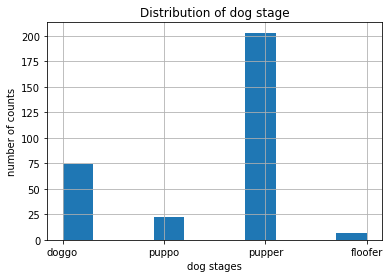

In [74]:
twitter_master.dog_stage.hist()
plt.xlabel('dog stages')
plt.ylabel('number of counts')
plt.title('Distribution of dog stage');